## Importar librerias a utilizar

In [96]:
# Manipulacion de datos
import pandas as pd
import numpy as np

# Graficos
import matplotlib.pyplot as plt
import seaborn as sns

# MODELOS
import sklearn as skt
from sklearn.linear_model import LinearRegression # para regresion lineal multiple
from sklearn.linear_model import SGDRegressor # para gradientes
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, ElasticNetCV, LassoCV # para regularizacion

# split y pipeline para entrenamiento de modelos
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Metricas de los modelos
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

# Escalado de datos
from sklearn.preprocessing import RobustScaler # pruebas
from sklearn.preprocessing import StandardScaler # usado

# ignorar warnings
import warnings
warnings.filterwarnings("ignore")

## Lectura del dataset y primer analisis

In [2]:
df = pd.read_csv("weatherAUS.csv", delimiter=",")

In [3]:
df.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        145412 non-null  int64  
 1   Date              145412 non-null  object 
 2   Location          145412 non-null  object 
 3   MinTemp           143928 non-null  float64
 4   MaxTemp           144159 non-null  float64
 5   Rainfall          142152 non-null  float64
 6   Evaporation       82658 non-null   float64
 7   Sunshine          75616 non-null   float64
 8   WindGustDir       135096 non-null  object 
 9   WindGustSpeed     135159 non-null  float64
 10  WindDir9am        134850 non-null  object 
 11  WindDir3pm        141186 non-null  object 
 12  WindSpeed9am      143645 non-null  float64
 13  WindSpeed3pm      142351 non-null  float64
 14  Humidity9am       142759 non-null  float64
 15  Humidity3pm       140907 non-null  float64
 16  Pressure9am       13

In [5]:
#-----------# Filtrado de localidad y eliminacion de columna Unnamed: 0#-----------#

localidades = ["SydneyAirport", "Sydney", "Canberra", "Melbourne", "MelbourneAirport" ]

# Filtrado del dataset por localidad SydneyAirport
df_filtrado = df[df['Location'].isin(localidades)]

# Eliminar la columna 'Unnamed: 0'
df_filtrado = df_filtrado.drop('Unnamed: 0', axis=1)

df_filtrado.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
30167,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes,6.0
30168,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,6.6
30169,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,18.8
30170,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,77.4
30171,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,1.6


In [6]:
df_filtrado.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,15495.000000,15500.000000,15199.000000,14280.000000,14038.000000,14531.000000,15725.000000,15737.000000,15416.000000,15461.000000,15251.000000,15260.000000,13309.000000,13054.000000,15481.000000,15490.000000,15199.000000
mean,11.605221,21.751781,2.303744,4.866828,6.854694,44.417315,16.613672,21.797166,68.903023,51.280577,1018.305836,1016.064239,4.750545,4.746131,15.545953,20.229154,2.302586
std,5.851347,6.053679,7.385992,3.069869,3.842419,14.958027,10.336386,9.518033,15.614788,17.721335,7.400730,7.265386,2.728329,2.589879,5.559295,5.857956,7.385251
min,-8.000000,4.100000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,11.000000,3.000000,986.700000,985.500000,0.000000,0.000000,-1.300000,3.700000,0.000000
25%,7.900000,17.100000,0.000000,2.600000,3.700000,33.000000,9.000000,15.000000,59.000000,39.000000,1013.400000,1011.200000,2.000000,2.000000,11.600000,15.900000,0.000000
50%,11.600000,21.300000,0.000000,4.200000,7.500000,43.000000,15.000000,20.000000,70.000000,51.000000,1018.500000,1016.300000,6.000000,6.000000,15.400000,19.800000,0.000000
75%,15.800000,25.800000,0.800000,6.600000,10.000000,54.000000,22.000000,28.000000,80.000000,62.000000,1023.300000,1021.000000,7.000000,7.000000,19.500000,24.100000,0.800000
max,30.500000,46.800000,119.400000,23.800000,13.900000,122.000000,69.000000,76.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.200000,46.100000,119.400000


Objetivo

Familiarizarse con la librería scikit-learn y las herramientas que brinda para el pre-procesamiento de datos, la implementación de modelos y la evaluación de métricas, y con TensorFlow para el entrenamiento de redes neuronales.

Dataset

El dataset se llama weatherAUS.csv y contiene información climática de Australia de los últimos diez años, incluyendo si para el día siguiente llovió o no y la cantidad de lluvia en las columnas ‘RainTomorrow’ y ‘RainfallTomorrow’. El objetivo es la predicción de estas dos variables en función del resto de las características que se consideren adecuadas.

Tiene una columna ‘Location’ que indica la ciudad y el objetivo es predecir la condición de lluvia en las ciudades de Sydney, SydneyAirport, Canberra, Melbourne y MelbourneAirport (costa sureste). Pueden considerarse como una única ubicación. Descartar el resto de los datos.


## Tratamiento de datos faltantes

In [7]:
# Verificar cantidad de datos que faltan por columnas
df_filtrado.isna().sum()

Date                   0
Location               0
MinTemp              491
MaxTemp              486
Rainfall             787
Evaporation         1706
Sunshine            1948
WindGustDir         1457
WindGustSpeed       1455
WindDir9am           695
WindDir3pm           290
WindSpeed9am         261
WindSpeed3pm         249
Humidity9am          570
Humidity3pm          525
Pressure9am          735
Pressure3pm          726
Cloud9am            2677
Cloud3pm            2932
Temp9am              505
Temp3pm              496
RainToday            787
RainTomorrow         787
RainfallTomorrow     787
dtype: int64

In [8]:
#------------# Aplicacion de medidas para datos faltantes #------------#

# Eliminar filas vacias del dataframe RainTomorrow y RainfallTomorrow
df_filtrado = df_filtrado.dropna(subset=['RainTomorrow', 'RainfallTomorrow'])

"""
Explicacion:
RainTomorrow y RainfallTomorrow son variables que queremos predecir por eso al tener datos
faltantes no podemos inventarnos valores o repetirlos, debemos eliminar esas filas ya que no
hay forma de rellenarlos.
"""

df_filtrado.isna().sum()

Date                   0
Location               0
MinTemp               10
MaxTemp                6
Rainfall             163
Evaporation         1694
Sunshine            1939
WindGustDir         1445
WindGustSpeed       1443
WindDir9am           678
WindDir3pm           289
WindSpeed9am         260
WindSpeed3pm         249
Humidity9am           88
Humidity3pm           45
Pressure9am          253
Pressure3pm          245
Cloud9am            2041
Cloud3pm            2282
Temp9am               24
Temp3pm               16
RainToday            163
RainTomorrow           0
RainfallTomorrow       0
dtype: int64

In [9]:
# Crear funcion para rellenar datos segun corresponda
def rellenar(dataframe):

    for columna in dataframe.columns:

        # Verifica si la columna tiene datos faltantes
        if dataframe[columna].isnull().any():

            # Si es numérica y continua, rellena con el promedio
            if pd.api.types.is_numeric_dtype(dataframe[columna]) and not pd.api.types.is_integer_dtype(dataframe[columna]):
                dataframe[columna].fillna(dataframe[columna].mean(), inplace=True)

            # Si es numérica y discreta, rellena con la moda
            elif pd.api.types.is_numeric_dtype(dataframe[columna]):
                dataframe[columna].fillna(dataframe[columna].mode()[0], inplace=True)

           # Si es categórica, rellena con la moda
            else:
                dataframe[columna].fillna(dataframe[columna].mode()[0], inplace=True)

    return dataframe

In [10]:
# Rellena columnas
df1 = rellenar(df_filtrado)

# Reiniciar index
df1 =  df1.reset_index(drop = True)

df1.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
RainfallTomorrow    0
dtype: int64

## Analisis descriptivo

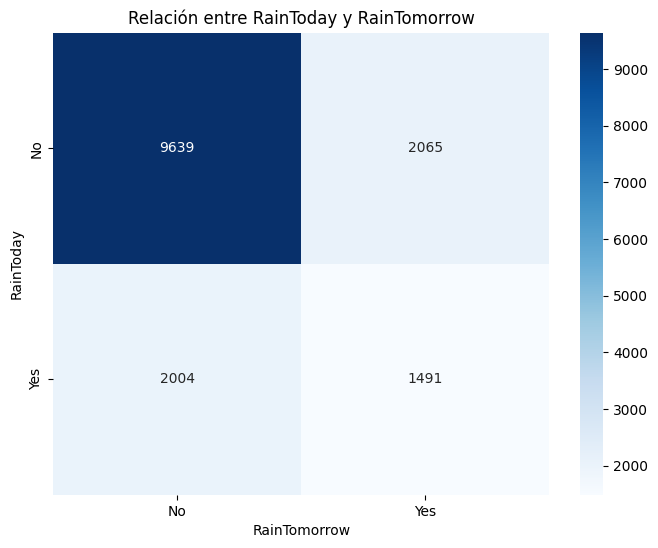

In [11]:
# Guarda las columnas categóricas y numericas
columnas_categoricas = df1.select_dtypes(exclude='number').columns
columnas_numericas = df1.select_dtypes(include='number').columns


# Ver influencia de RainToday en RainTomorrow
# Crear una tabla de contingencia
contingency_table = pd.crosstab(df1['RainToday'], df1['RainTomorrow'])

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear un heatmap de la tabla de contingencia
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

# Ajustes de diseño
plt.title('Relación entre RainToday y RainTomorrow')
plt.xlabel('RainTomorrow')
plt.ylabel('RainToday')

plt.show()

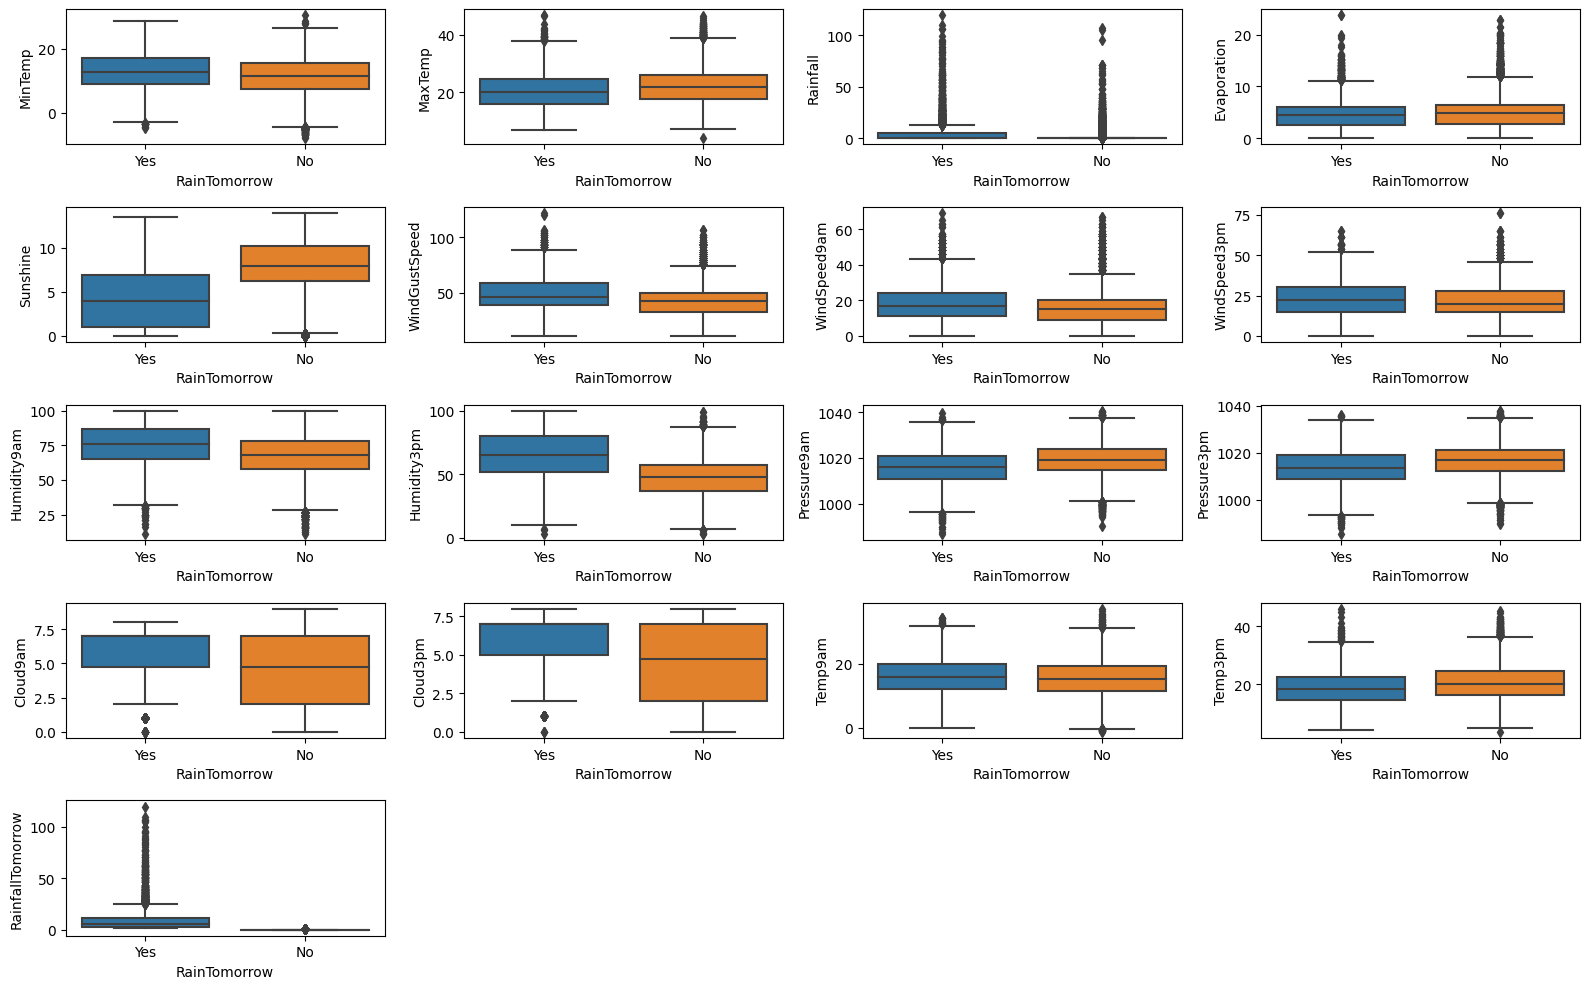

In [12]:
#Gráfico de Boxplot
# Configurar el tamaño de la figura
plt.figure(figsize=(16, 10))

# Crear subgráficos de cajas para cada variable numérica
for i, column in enumerate(columnas_numericas):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x='RainTomorrow', y=column, data=df1)

# Ajustes de diseño
plt.tight_layout()
plt.show()

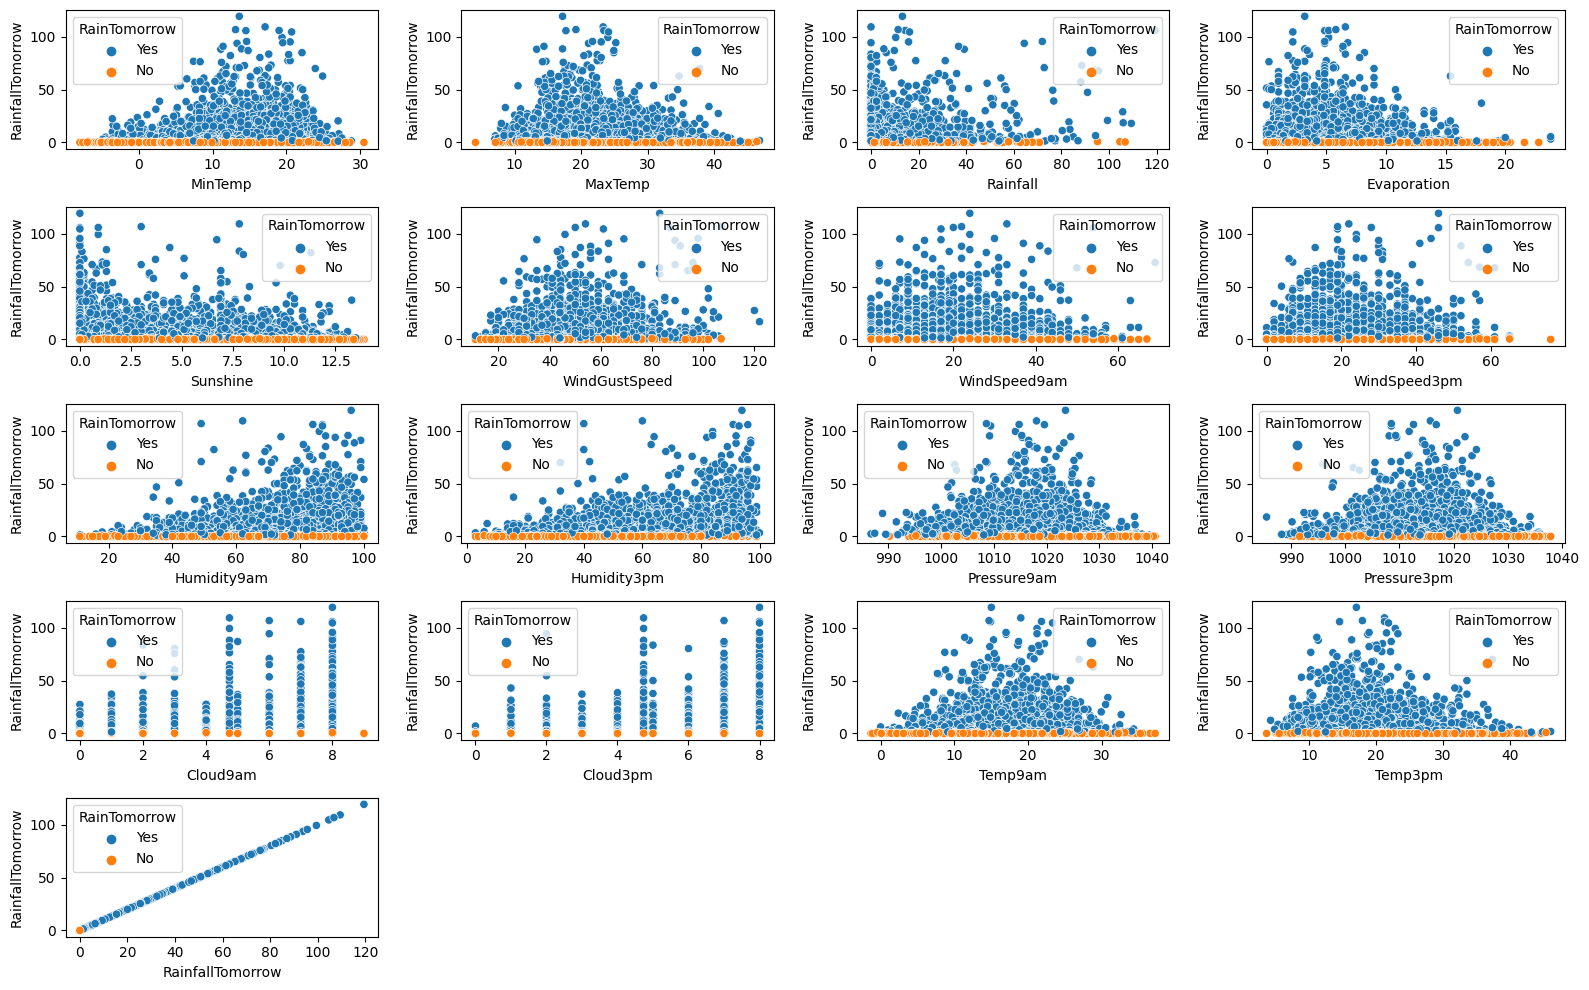

In [13]:
# Configurar el tamaño de la figura
plt.figure(figsize=(16, 10))

# Crear subgráficos de disperción para cada variable numérica
for i, column in enumerate(columnas_numericas):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(x=column,y='RainfallTomorrow',hue='RainTomorrow', data=df1)

# Ajustes de diseño
plt.tight_layout()
plt.show()

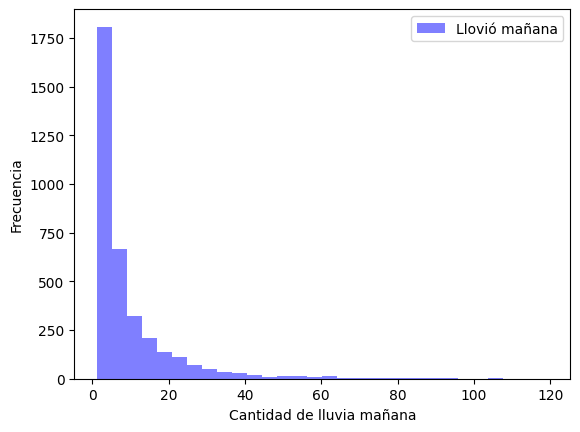

In [14]:
# Crear un histograma para la columna 'RainTomorrow'
plt.hist(df1[df1['RainTomorrow'] == 'Yes']['RainfallTomorrow'], bins=30, alpha=0.5, label='Llovió mañana', color='blue')

# Añadir etiquetas y leyenda
plt.xlabel('Cantidad de lluvia mañana')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el histograma
plt.show()

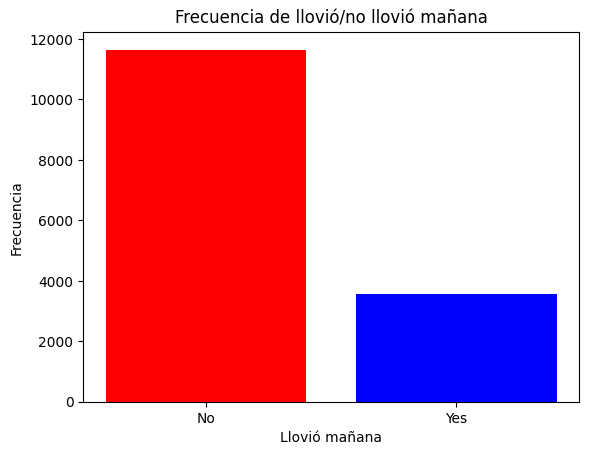

In [15]:
# Contar la frecuencia de 'RainTomorrow'
conteo_lluvia = df1['RainTomorrow'].value_counts()

# Crear un gráfico de barras
plt.bar(conteo_lluvia.index, conteo_lluvia, color=['red', 'blue'])

# Añadir etiquetas y título
plt.xlabel('Llovió mañana')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de llovió/no llovió mañana')

# Mostrar el gráfico de barras
plt.show()

## Paso de columnas categoricas a numericas

In [16]:
df_categorica=df1.copy()


In [17]:
from sklearn.preprocessing import LabelEncoder

# Aplicar codificación de etiqueta

le = LabelEncoder()
for categorica in columnas_categoricas:
 df_categorica[categorica] = le.fit_transform(df_categorica[categorica])

df_categorica.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,92,3,19.5,22.4,15.6,6.200000,0.0,3,44.323786,8,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1,6.0
1,93,3,19.5,25.6,6.0,3.400000,2.7,3,44.323786,13,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1,6.6
2,94,3,21.6,24.5,6.6,2.400000,0.1,3,44.323786,2,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1,18.8
3,95,3,20.2,22.8,18.8,2.200000,0.0,3,44.323786,5,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1,77.4
4,96,3,19.7,25.7,77.4,4.869108,0.0,3,44.323786,5,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1,1.6


##Matriz de correlación

In [ ]:
corr = df_categorica.corr().round(1)
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap="rocket", center=0)
plt.show()

## Seleccción de caracteristicas para la regresión

Utilizaremos todos los datos ya que requiere un costo obtener los mismos y son limitados.

# Implementar la solución del problema de regresión con regresión lineal múltiple

## LinearRegression

In [20]:
#------------# Estandarizacion de datos #------------#

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Filtrar el DataFrame con las columnas seleccionadas
df_regresion = df_categorica.drop(['RainTomorrow', 'RainfallTomorrow'], axis=1)

# Ajustar el scaler a los datos y transformarlos
df_regresion = pd.DataFrame(scaler.fit_transform(df_regresion), columns=df_regresion.columns)

Error cuadrático medio en entrenamiento: 40.880194930681014
Error cuadrático medio en predicciones: 48.77835511669546
Error absoluto medio en predicciones: 3.189405460125327
Intercept: [2.30738977]
Coeficientes: [[ 0.03602182  0.04645444 -0.59596405  0.61074163  1.13318895  0.18097343
  -1.09003969 -0.10049299  1.54487339  0.14560563  0.27168353 -0.10773632
  -0.69054644 -0.22430371  2.64948526  2.00663054 -2.11584028 -0.30595715
   0.14164398 -0.0726509   0.69977048  0.16246335]]
R2: 0.24114629013815891


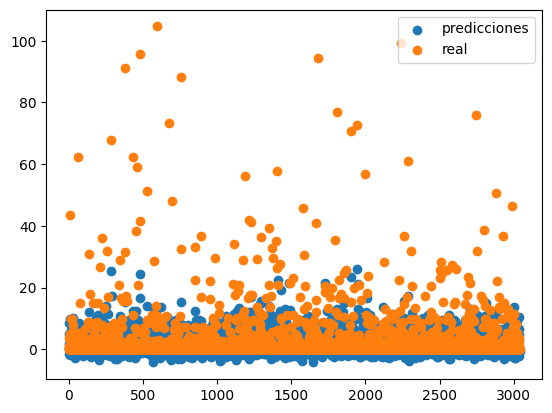

In [88]:
# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    df_regresion,
    df_categorica['RainfallTomorrow'].values.reshape(-1, 1),
    test_size=0.2,
    random_state=12)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, Y_train)

# Hacer predicciones sobre el conjunto de prueba
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Evaluar el modelo
print('Error cuadrático medio en entrenamiento:', metrics.mean_squared_error(Y_train, predictions_train))
print('Error cuadrático medio en predicciones:', metrics.mean_squared_error(Y_test, predictions_test))
print('Error absoluto medio en predicciones:', mean_absolute_error(Y_test, predictions_test))
print('Intercept:', model.intercept_)
print('Coeficientes:', model.coef_)
print('R2:', model.score(X_test, Y_test))

x=range(len(Y_test))
plt.scatter(x, y=predictions_test, label='predicciones')
plt.scatter(x, y=Y_test, label='real')
plt.legend()
plt.show()

# metodos de gradiente

Error cuadrático medio en entrenamiento: 40.96659432893721
Error cuadrático medio en predicciones: 48.73084190849909
Error absoluto medio en predicciones: 3.220956577023552
Intercept: [2.24684929]
Coeficientes: [-0.03278692  0.16196844 -0.56916688  0.62970758  1.18765999  0.20359573
 -1.1042666  -0.15927452  1.55097027  0.11335475  0.19358708 -0.1675121
 -0.642958   -0.14710481  2.67011781  2.01698115 -2.0192479  -0.30457923
  0.15295522 -0.06103461  0.75203685  0.21615824]
R2: 0.2418854617281192


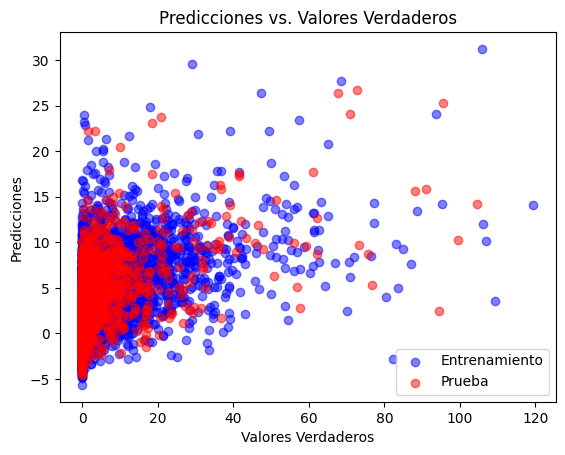

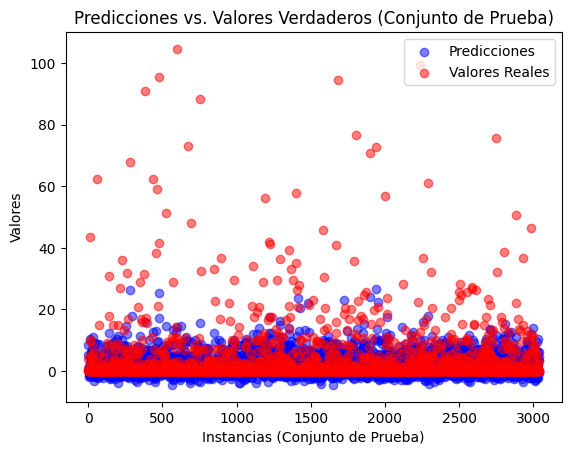

In [86]:
# metodo de gradiente estocaico por SGDRegressor
"""
Este modelo de regresion lineal ya implementa de forma interna el gradiente estocaico
"""
# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    df_regresion,
    df_categorica['RainfallTomorrow'].values.reshape(-1, 1),
    test_size=0.2,
    random_state=12)

# Crear y entrenar el modelo de regresión lineal con SGD
model = SGDRegressor(learning_rate='invscaling', eta0=0.01, max_iter=1000, random_state=42)
#model = SGDRegressor(learning_rate='constant', eta0=0.001, max_iter=1500, random_state=42)
#model = SGDRegressor(learning_rate='adaptive',  max_iter=2500, random_state=42)
model.fit(X_train, Y_train)

# Hacer predicciones en los conjuntos de entrenamiento y prueba
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Evaluar el modelo
print('Error cuadrático medio en entrenamiento:', metrics.mean_squared_error(Y_train, predictions_train))
print('Error cuadrático medio en predicciones:', metrics.mean_squared_error(Y_test, predictions_test))
print('Error absoluto medio en predicciones:', mean_absolute_error(Y_test, predictions_test))
print('Intercept:', model.intercept_)
print('Coeficientes:', model.coef_)
print('R2:', model.score(X_test, Y_test))

# Visualizar predicciones vs. valores reales con colores diferentes
plt.scatter(Y_train, predictions_train, label='Entrenamiento', color='blue', alpha=0.5)
plt.scatter(Y_test, predictions_test, label='Prueba', color='red', alpha=0.5)
plt.xlabel('Valores Verdaderos')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Verdaderos')
plt.legend()
plt.show()


x_test = range(len(Y_test))

plt.scatter(x_test, predictions_test, label='Predicciones', color='blue', alpha=0.5)
plt.scatter(x_test, Y_test, label='Valores Reales', color='red', alpha=0.5)

plt.xlabel('Instancias (Conjunto de Prueba)')
plt.ylabel('Valores')
plt.title('Predicciones vs. Valores Verdaderos (Conjunto de Prueba)')
plt.legend()
plt.show()


# R2: 0.2418854617281192 learning_rate='invscaling', eta0=0.01, max_iter=1000, random_state=42
# R2: 0.24197630208614485 learning_rate='constant', eta0=0.001, max_iter=1500, random_state=42
# R2: 0.24114837573788284 learning_rate='adaptive',  max_iter=2500, random_state=42

In [103]:
df_regresion.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

R2 Score (entrenamiento): 0.21519202132236115
R2 Score (prueba): 0.23910615766207122
MSE (entrenamiento): 40.88996004189495
MSE (prueba): 48.90949278540611
RMSE (entrenamiento): 6.394525787100632
RMSE (prueba): 6.993532210936482
MAE (entrenamiento): 3.096583806236508
MAE (prueba): 3.1839567226603216
MAPE (entrenamiento): inf
MAPE (prueba): inf


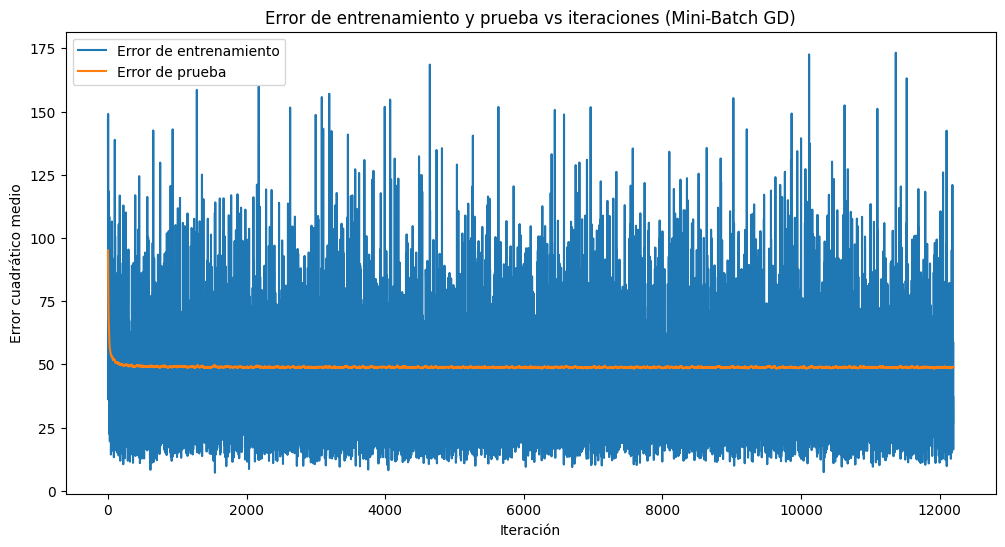

array([[ 2.30210066],
       [ 0.01200317],
       [ 0.04726232],
       [-0.59631172],
       [ 0.6117972 ],
       [ 1.08677125],
       [ 0.17572214],
       [-1.10041047],
       [-0.10134394],
       [ 1.51609077],
       [ 0.1551776 ],
       [ 0.27904448],
       [-0.10623804],
       [-0.71475408],
       [-0.22806179],
       [ 2.6546434 ],
       [ 2.00965788],
       [-2.10460357],
       [-0.30340856],
       [ 0.1583573 ],
       [-0.07935405],
       [ 0.69541703],
       [ 0.12835661]])

In [91]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, batch_size=11):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):

        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    # Métricas de evaluación
    y_train_pred = np.matmul(X_train, W)
    y_test_pred = np.matmul(X_test, W)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    print(f'R2 Score (entrenamiento): {r2_train}')
    print(f'R2 Score (prueba): {r2_test}')
    print(f'MSE (entrenamiento): {mse_train}')
    print(f'MSE (prueba): {mse_test}')
    print(f'RMSE (entrenamiento): {rmse_train}')
    print(f'RMSE (prueba): {rmse_test}')
    print(f'MAE (entrenamiento): {mae_train}')
    print(f'MAE (prueba): {mae_test}')
    print(f'MAPE (entrenamiento): {mape_train}')
    print(f'MAPE (prueba): {mape_test}')

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
    plt.show()

    return W

# Utilizar el método con tus datos
mini_batch_gradient_descent(X_train, Y_train, X_test, Y_test, lr=0.01, epochs=200, batch_size= 200)



# regularizacion

## Ridge Regression


In [172]:
# Creación y entrenamiento del modelo. Scikit-Learn usa Cross Validation para encontrar el valor óptimo de alpha
# (lambda en los desarrollos de teoría). Puede ser problemático con series de tiempo.

modelo = make_pipeline(StandardScaler(),
                        RidgeCV(
                           alphas          = np.logspace(-10, 10, 200),
                           fit_intercept   = True,
                           store_cv_values = True
                        )
         )

_ = modelo.fit(X_train, Y_train)




# Realizar predicciones
predictions = modelo.predict(X_test)

# Calcular metricas
r2 = r2_score(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, predictions)
mape = np.mean(np.abs((Y_test - predictions) / Y_test)) * 100

# Imprimir metricas
print(f'R2 Score: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

R2 Score: 0.24062747663867035
MSE: 48.81170392792021
RMSE: 6.986537334611489
MAE: 3.1851504345306227
MAPE: inf


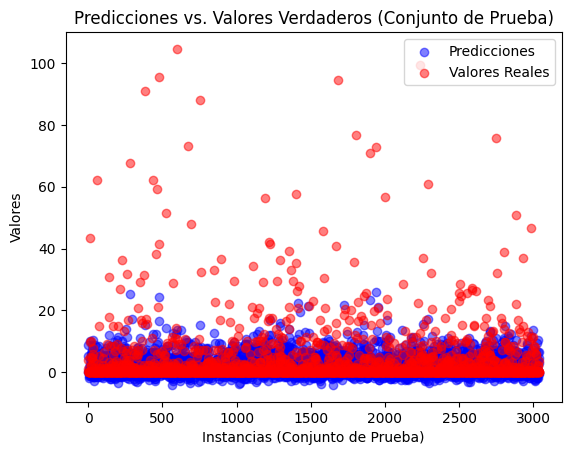

In [173]:
x_test = range(len(Y_test))

plt.scatter(x_test, predictions, label='Predicciones', color='blue', alpha=0.5)
plt.scatter(x_test, Y_test, label='Valores Reales', color='red', alpha=0.5)

plt.xlabel('Instancias (Conjunto de Prueba)')
plt.ylabel('Valores')
plt.title('Predicciones vs. Valores Verdaderos (Conjunto de Prueba)')
plt.legend()
plt.show()

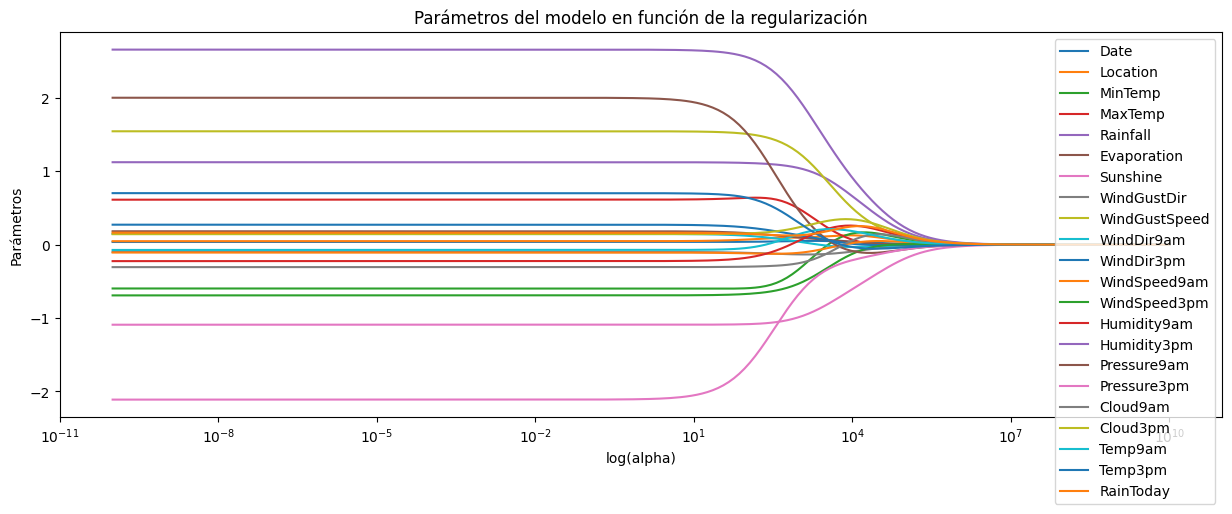

In [132]:
# Evolución de los parámetros en función de alpha

alphas = modelo.steps[1][1].alphas
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    modelo_aux.fit(X_train, Y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.legend()
plt.show()

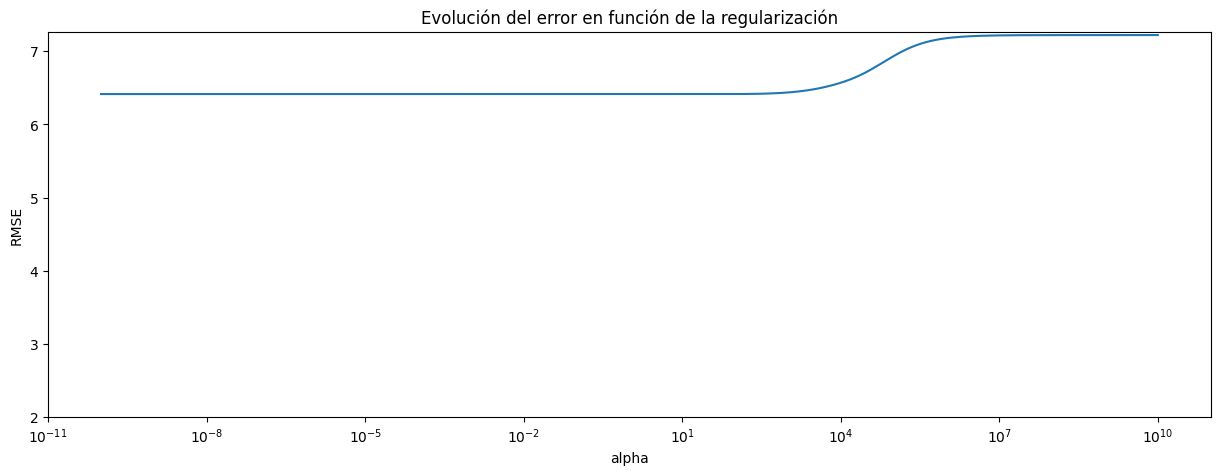

In [133]:
# Evolución del error de validación cruzada en función de alpha

# modelo.cv_values almacena el MSE de CV para cada valor de alpha.

mod = modelo.steps[1][1]

mse_cv = mod.cv_values_.reshape((-1, 200)).mean(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [134]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")

Mejor valor de alpha encontrado: 28.66067616948256


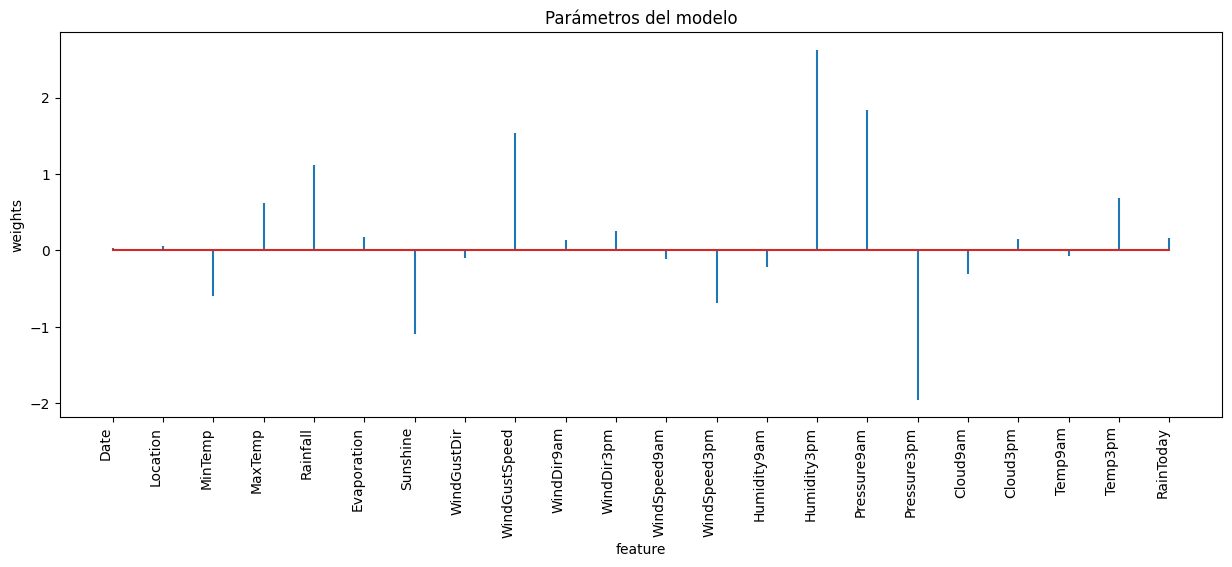

In [135]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns,'coef': mod.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15,5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo');

In [165]:
# Error de test del modelo

rmse_ridge = mean_squared_error(Y_test,
                predictions,
                squared = False
             )

print(f"El error (rmse) de test es: {rmse_ridge}")



El error (rmse) de test es: 6.986537334611489


## Lasso Regression


In [174]:
modelo = make_pipeline(StandardScaler(),
                        LassoCV(
                           alphas=np.logspace(-10, 10, 200),
                           cv=10
                        )
         )

_ = modelo.fit(X_train, Y_train)


# realizar predicciones
predictions = modelo.predict(X_test)

# Calcular metricas
r2 = r2_score(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, predictions)
mape = np.mean(np.abs((Y_test - predictions) / Y_test)) * 100

# imprimir metricas
print(f'R2 Score: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

R2 Score: 0.24088426037668997
MSE: 48.79519812686985
RMSE: 6.98535597710452
MAE: 3.184682478391639
MAPE: inf


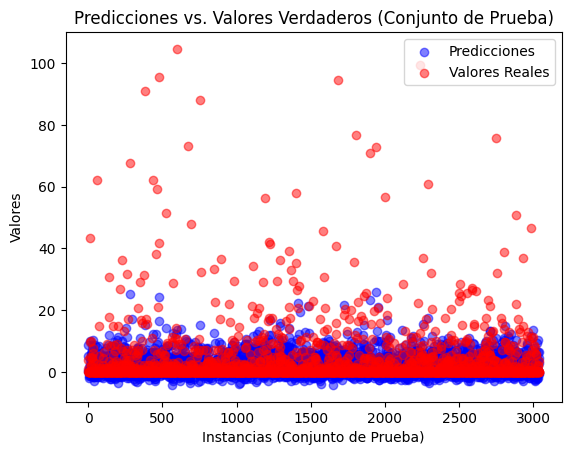

In [175]:
x_test = range(len(Y_test))

plt.scatter(x_test, predictions, label='Predicciones', color='blue', alpha=0.5)
plt.scatter(x_test, Y_test, label='Valores Reales', color='red', alpha=0.5)

plt.xlabel('Instancias (Conjunto de Prueba)')
plt.ylabel('Valores')
plt.title('Predicciones vs. Valores Verdaderos (Conjunto de Prueba)')
plt.legend()
plt.show()

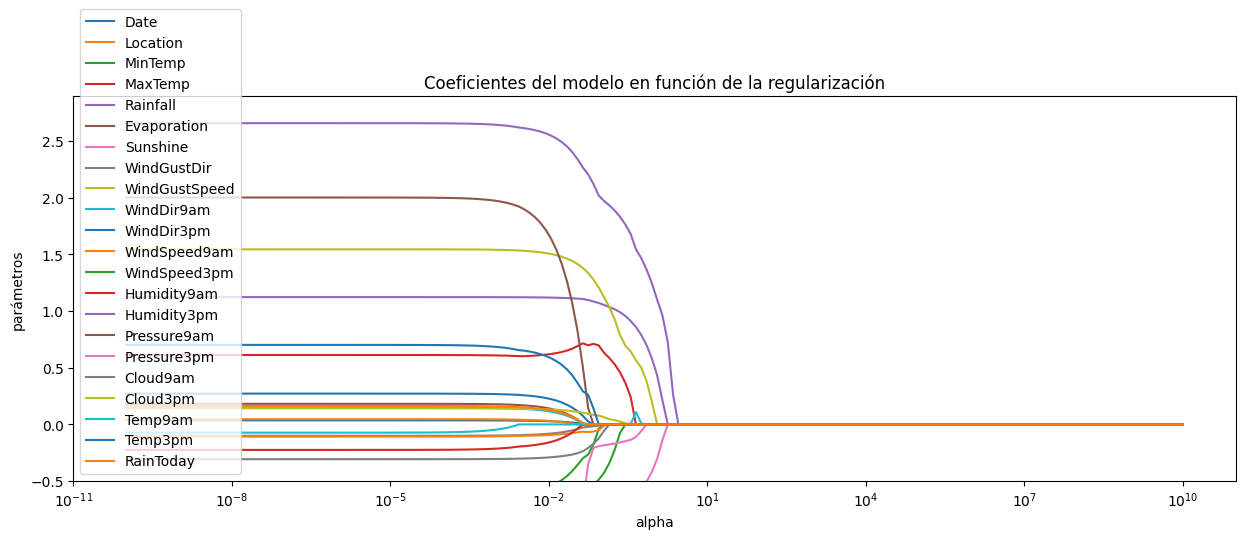

In [139]:
# Evolución de los parámetros en función de alpha

mod = modelo.steps[1][1]

alphas = mod.alphas_
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, Y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.legend()
ax.set_title('Coeficientes del modelo en función de la regularización')
plt.show()

Text(0.5, 1.0, 'Features incluidas en función de la regularización')

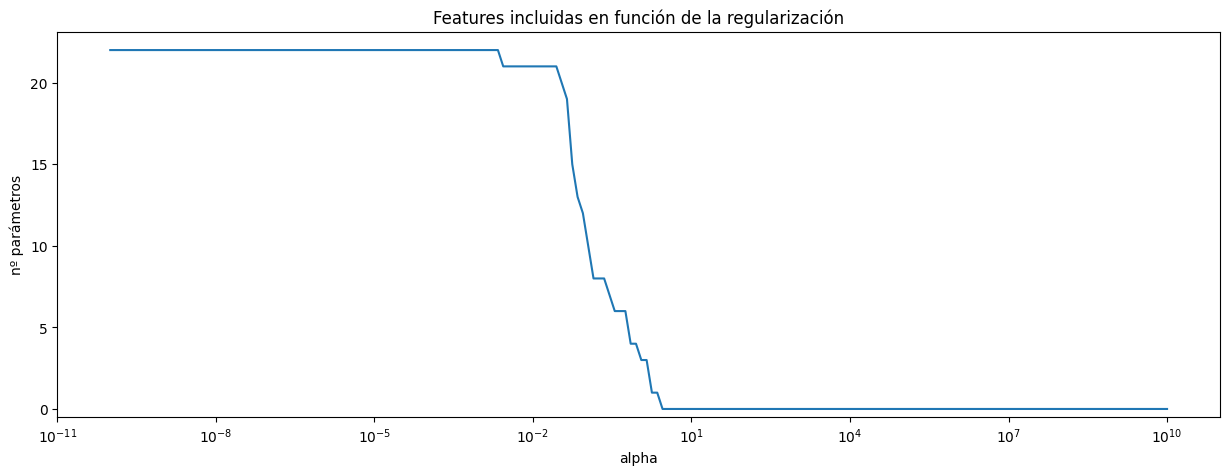

In [141]:
# Número de features incluidas (parámetros !=0) en función de alpha
alphas = mod.alphas_
n_predictores = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, Y_train)
    coef_no_cero = np.sum(modelo_aux.steps[1][1].coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº parámetros')
ax.set_title('Features incluidas en función de la regularización')

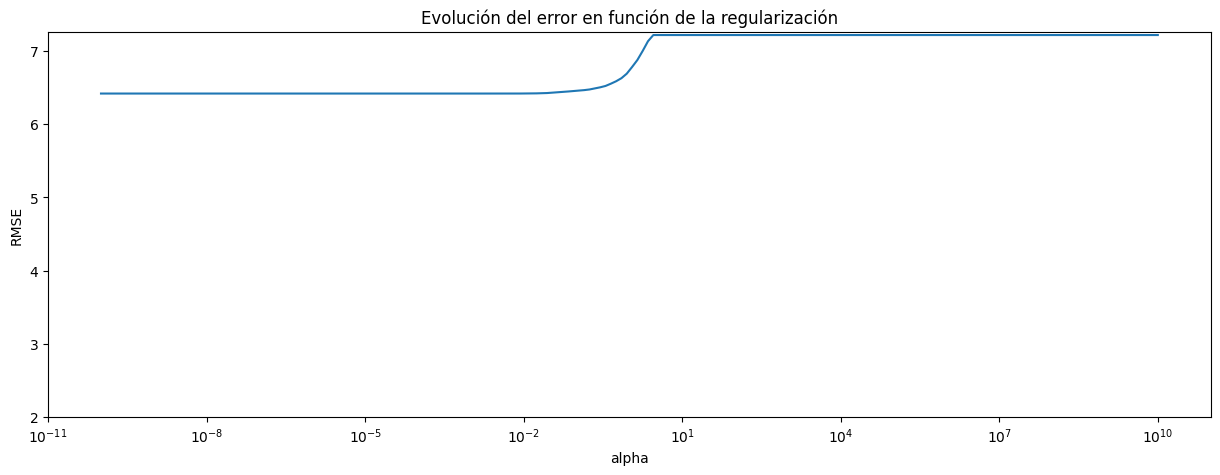

In [142]:
# Evolución del error de validación cruzada en función de alpha

# modelo.mse_path almacena el MSE de CV para cada valor de alpha.

mse_cv = mod.mse_path_.mean(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas_[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas_, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [143]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")

Mejor valor de alpha encontrado: 0.0034489622604057598


In [167]:
# Error de test del modelo

rmse_lasso = mean_squared_error(Y_test, predictions, squared = False)
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 6.98535597710452


## ElasticNet

In [168]:
modelo = make_pipeline(StandardScaler(),
                        ElasticNetCV(
                              l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
                              alphas          = np.logspace(-10, 10, 200),
                              cv              = 10
                           )
         )

_ = modelo.fit(X_train, Y_train)

# Realizar predicciones
predictions = modelo.predict(X_test)

# Calcular metricas
r2 = r2_score(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, predictions)
mape = np.mean(np.abs((Y_test - predictions) / Y_test)) * 100

# Imprimir metricas
print(f'R2 Score: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

mod = modelo.steps[1][1]

R2 Score: 0.240393503380386
MSE: 48.82674349421882
RMSE: 6.987613576480801
MAE: 3.183353521213536
MAPE: inf


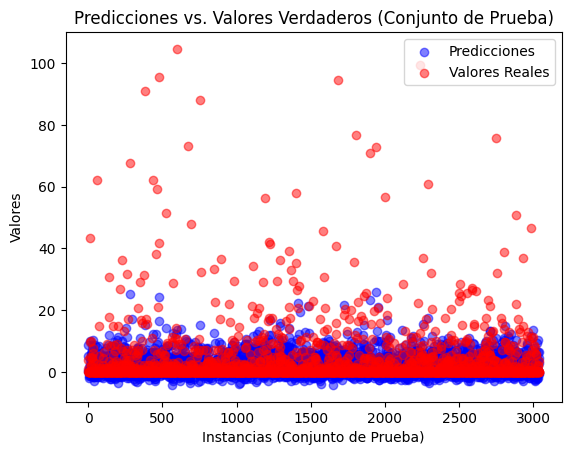

In [176]:
x_test = range(len(Y_test))

plt.scatter(x_test, predictions, label='Predicciones', color='blue', alpha=0.5)
plt.scatter(x_test, Y_test, label='Valores Reales', color='red', alpha=0.5)

plt.xlabel('Instancias (Conjunto de Prueba)')
plt.ylabel('Valores')
plt.title('Predicciones vs. Valores Verdaderos (Conjunto de Prueba)')
plt.legend()
plt.show()

In [ ]:
# Error medio de las 10 particiones por cada valor de alpha y l1_ratio
mean_error_cv = mod.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha) se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [mod.l1_ratio, mod.alphas_],
                                    names     = ['l1_ratio', 'mod.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

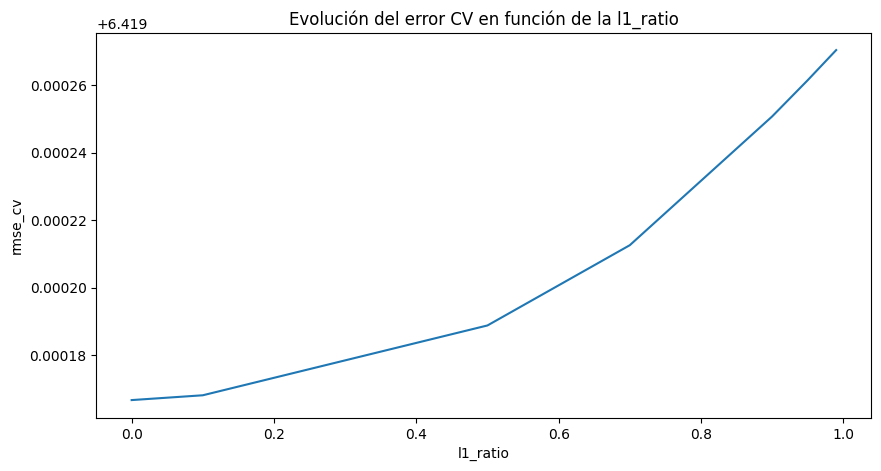

In [147]:
fig, ax = plt.subplots(figsize=(10, 5))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

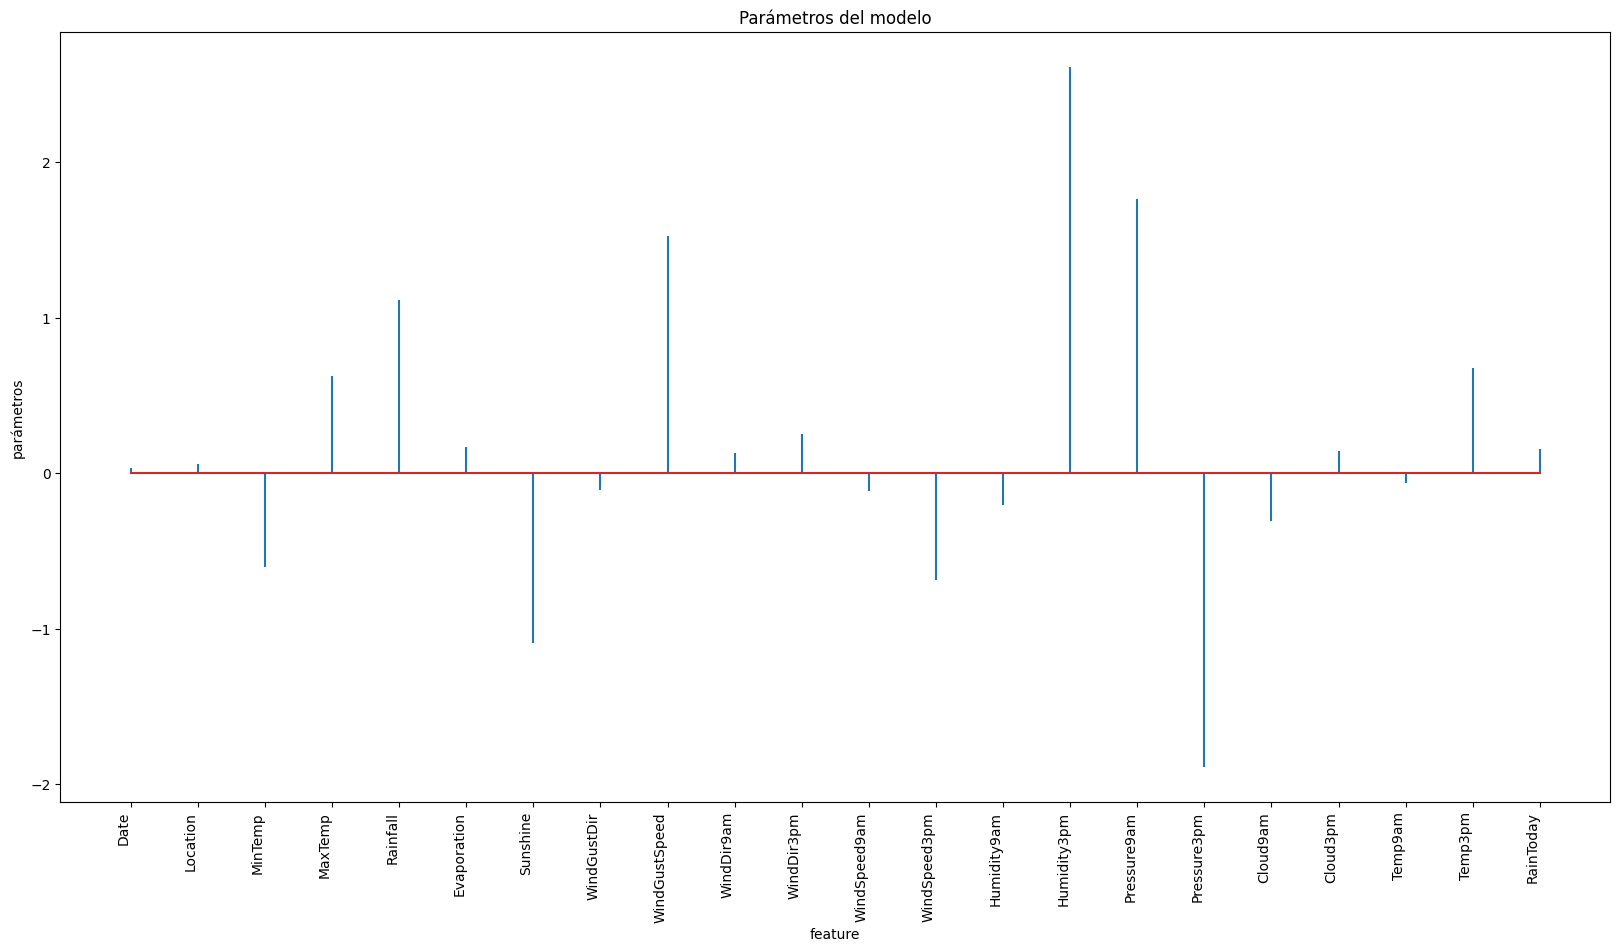

In [149]:
# Parámetros del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': mod.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

In [169]:
# Error de test del modelo

rmse_elastic = mean_squared_error(Y_test, predictions, squared = False)
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")


El error (rmse) de test es: 6.987613576480801


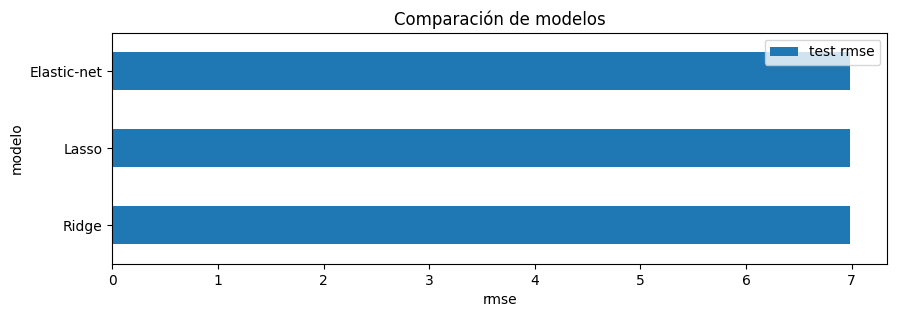

In [177]:
# Comparacion entre modelos
df_comparacion = pd.DataFrame({
                    'modelo': ['Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [ rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(10, 3))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

In [171]:
df_comparacion.head()

,modelo,test rmse
0,Ridge,6.986537
1,Lasso,6.985356
2,Elastic-net,6.987614


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_0, *['test rmse'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_1, *['modelo'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['test rmse'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_3, *['test rmse', 'modelo'], **{'inner': 'stick'})
chart